# Epsilon Greedy

In [35]:
from environment import bandit_env
import numpy as np

np.random.seed(10)

def argmax(reward):
    max_reward = reward[0]
    ties = [0]

    for idx, i in enumerate(reward[1:]):
        if i > max_reward:
            max_reward = i
            ties = [idx+1]
        if i == max_reward:
            ties.append(idx+1)
    
    if len(ties) > 1:
        index_of_max = np.random.choice(ties)
    else:
        index_of_max = ties[0]
    
    return index_of_max

# create bandit_env
q_mean = [2.5, -3.5, 1.0, 5.0, -2.5] 
q_stddev = [0.33, 1.0, 0.66, 1.98, 1.65] 

arm_bandit_env = bandit_env(q_mean, q_stddev)

print("Number of levers: ",arm_bandit_env.n)
print("Mean of each lever: ",arm_bandit_env.r_mean)
print("Standard Deviation of each lever: ",arm_bandit_env.r_stddev)

# implement e greedy policy
def e_greedy(rewards, e):
    # choose random action with probability e
    if np.random.rand() < e:
        return np.random.randint(0, len(rewards))

    # choose greedy action with probability 1-e
    else:
        return argmax(rewards)

average_rewards = np.zeros(6)

cumulative_rewards = [[], [], [], [], [], []]

epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
for idx, e in enumerate(epsilons):
    actual_reward = 0
    actions = [0, 0, 0, 0, 0]
    rewards = [0, 0, 0, 0, 0]

    for i in range(1000):
        action = e_greedy(rewards, e)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward
        
        actions[action] += 1

        rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])
        cumulative_rewards[idx].append(actual_reward/(i+1))
    # print(rewards)
    average_rewards[idx] = actual_reward/1000
print(epsilons)
print(average_rewards)

Number of levers:  5
Mean of each lever:  [2.5, -3.5, 1.0, 5.0, -2.5]
Standard Deviation of each lever:  [0.33, 1.0, 0.66, 1.98, 1.65]
[0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25]
[4.5033535  4.69147178 4.72226565 4.80731172 4.56047084 3.80043579]


In [36]:
print(rewards)

[2.483230615394033, -3.5891332478440554, 1.0692821953389302, 4.984502591930207, -2.117133889337802]


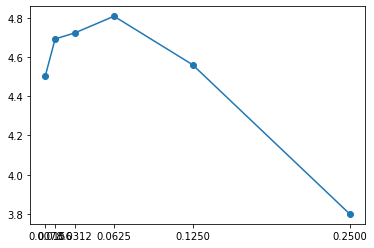

In [37]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,10))
plt.scatter(epsilons ,average_rewards)
plt.plot(epsilons, average_rewards)
plt.xticks(epsilons)
plt.show()

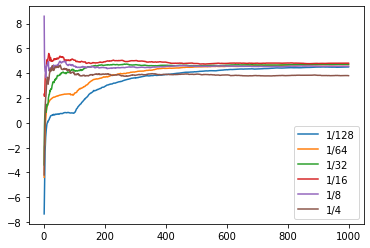

In [38]:
for i in range(6):
    plt.plot(range(1,1001), cumulative_rewards[i])
plt.legend(['1/128', '1/64', '1/32', '1/16', '1/8', '1/4'])
plt.show()

# Optimistic Greedy

In [56]:
from environment import bandit_env
import numpy as np

# np.random.seed(10)

average_rewards = np.zeros(5)
initial_values = [1/4,1/2,1,2,4]
avg = [0]*5
cumulative_rewards = [[], [], [], [], []]
for idx, val in enumerate(initial_values):
    actual_reward = 0
    rewards = [val]*5
    # print(rewards)
    for i in range(1000):   

        action = argmax(rewards)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward

        rewards[action] = rewards[action] + (0.1) * (reward - rewards[action])
        cumulative_rewards[idx].append(actual_reward/(i+1))
    average_rewards[idx] = actual_reward/1000
    # print(rewards)
    # print()
print(average_rewards)

[1.04032172 2.49119523 2.48688756 2.49044158 5.05949665]


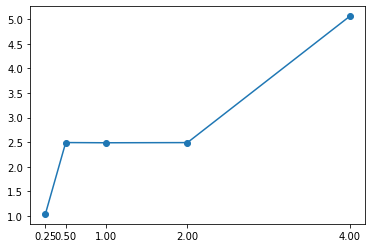

In [57]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,10))
plt.scatter(initial_values, average_rewards)
plt.plot(initial_values, average_rewards)
plt.xticks(initial_values)
plt.show()

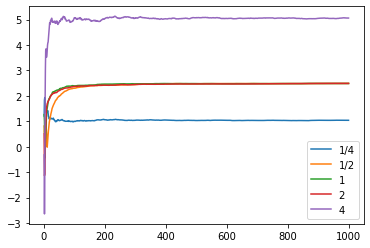

In [58]:
for i in range(5):
    plt.plot(range(1,1001), cumulative_rewards[i])
plt.legend(['1/4','1/2','1','2','4'])
plt.show()

# UCB 

In [138]:
from environment import bandit_env
import numpy as np

# np.random.seed(10)

actions = [0, 0, 0, 0, 0]
average_rewards = [0]*6
rewards = [0, 0, 0, 0, 0]

c = [1/16, 1/4, 1/2, 1, 2, 4]

# play each action once
for i in range(5):
    action = i
    reward = arm_bandit_env.pull(action)
    actions[action] += 1
    rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])

# print(rewards)
cumulative_rewards = [[], [], [], [], [], []]
for idx, val in enumerate(c):
    actual_reward = 0
    for i in range(1,1001):   
        vals = []
        # if i == 0:
            # action = argmax(rewards)
        # else:
        for index in range(len(actions)):
            vals.append(rewards[index] + val*np.sqrt((np.log(i))/(actions[index])))
        action = argmax(vals)
        reward = arm_bandit_env.pull(action)
        actual_reward += reward
        actions[action] += 1
        rewards[action] = rewards[action] + (1/(actions[action])) * (reward - rewards[action])
        cumulative_rewards[idx].append(actual_reward/(i+1))

    average_rewards[idx] = actual_reward/1000
print(average_rewards)

[5.038310101684617, 4.94796553181274, 5.035537632282915, 5.012792355615512, 5.052077270583287, 4.9947462578957165]


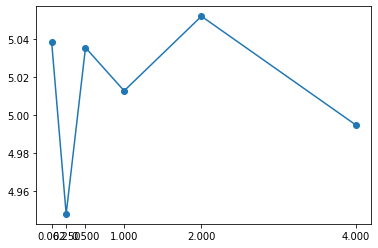

In [139]:
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,10))
plt.scatter(c, average_rewards)
plt.plot(c, average_rewards)
plt.xticks(c)
plt.show()

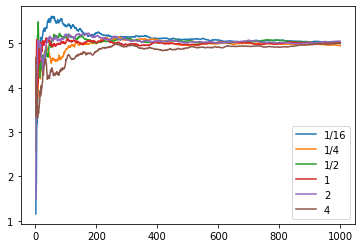

In [140]:
for i in range(6):
    plt.plot(range(1,1001), cumulative_rewards[i])
plt.legend(['1/16', '1/4','1/2','1','2','4'])
plt.show()

# Gradient Bandit

# Useless

In [ ]:
import numpy as np

## Initialization

In [ ]:
# 5 bandits
q = [2.5, -3.5, 1.0, 5.0, -2.5] # actual mean of distribution
std = [0.33, 1.0, 0.66, 1.98, 1.65] # actual standard deviation of distribution

## Setting up the enviroment

In [ ]:
from environment import bandit_env # upload environment.py

In [ ]:
bandits = bandit_env(q, std)

In [ ]:
bandits.r_mean

[2.5, -3.5, 1.0, 5.0, -2.5]

In [ ]:
bandits.r_stddev

[0.33, 1.0, 0.66, 1.98, 1.65]

In [ ]:
bandits.n

5

In [ ]:
def argmax(reward):
    max_reward = reward[0]
    ties = [0]

    for idx, i in enumerate(reward[1:]):
        if i > max_reward:
            max_reward = i
            ties = [idx+1]
        if i == max_reward:
            ties.append(idx+1)
    
    if len(ties) > 1:
        index_of_max = np.random.choice(ties)
    else:
        index_of_max = ties[0]
    
    return index_of_max


In [ ]:
cnts = [0]*5
rewards = [0, 0, 0, 0, 0]
for i in range(1000):
    cnts[argmax(rewards)] += 1
cnts

[201, 192, 212, 189, 206]

## Epsilon greedy

In [ ]:
def epsilon_greedy(rewards, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(5)
    else:
        return argmax(rewards)

In [ ]:
np.array([1,1,1,1]) + [1.2,2,3,4]

array([2.2, 3. , 4. , 5. ])

In [ ]:
from tqdm import tqdm

actual_average_reward = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


for i in tqdm(range(100)):
    epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
    avg_reward = []

    for e in epsilons:  
        rewards = np.zeros(5)
        actions = np.zeros(5)
        for i in range(1000):
            action = epsilon_greedy(rewards, e)
            rewards[action] += bandits.pull(action)
            actions[action] += 1
            rewards[action] /= actions[action]
        # rewards = rewards/1000
        # print(np.sum(rewards))

        avg_reward.append(np.sum(rewards)/len(rewards))
        # print(avg_reward)
    actual_average_reward += avg_reward
actual_average_reward /= 100

100%|██████████| 100/100 [00:08<00:00, 11.31it/s]


## Plotting

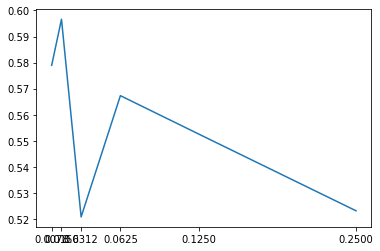

[0.20177094525372605,
 0.990694302606937,
 0.9564305665688322,
 0.202246064031926,
 0.1996880189218282,
 0.7704684879550702]

In [ ]:
import matplotlib.pyplot as plt
# plt.scatter(epsilons ,avg_reward)
plt.plot(epsilons, actual_average_reward)
plt.xticks(epsilons)
plt.show()
avg_reward

# Value Iterations

## Initialization

In [159]:
states = [0, 1, 2] # Hostel, Canteen, Academic Building
rewards = [-1, +1, +3]
actions = [0, 1] # attend, eat

gamma = 0.9


data = [
        
        # Hostel
        [
         #attend
         [
          [0.5, 0, -1], # prob, next state, reward
          [0.5, 2, +3]
         ],
        
         #eat
         [
          [1, 1, +1]
         ]
        ],
        
        # Canteen
        [
         #attend
         [
          [0.3, 0, -1],
          [0.6, 2, +3],
          [0.1, 1, +1]
         ],
         
         #eat
         [
          [1,1,+1]
         ]
        ],
        
        # Academic Building
        [
         #attend
         [
          [0.3, 1, +1],
          [0.7, 2, +3]
         ],
         #eat
         [
          [0.8, 1, +1],
          [0.2, 2, +3]
         ]
        ]
]



In [167]:
theta = 0.000001

v = [0, 0, 0] # H, C, AB

j = 0
while True:
    j+=1
    delta = 0

    for i in range(len(states)):
        action = [0, 0]

        for a in actions:
            # print('op')
            for prob, next_state, reward in data[i][a]:
                # print(prob, next_state, reward)
                action[a] += prob * (reward + gamma * v[next_state])
                # print("pol",a,action[a])
        
        best_action_value = max(action)

        delta = max(delta, abs(best_action_value - v[i]))
        v[i] = best_action_value

        # print(delta)
        # if (i+2)%3 == 0:
            # print(v)
    if delta < theta:
        print(f'Value converged at iteration {j}')
        break
v

Value converged at iteration 107


[18.951372028251477, 19.807446613546325, 20.940567645865922]

In [168]:
policy = [-1, -1, -1]
for s in range(len(states)):
    action = [0, 0]
    for a in actions:
        for prob, next_state, reward in data[s][a]:
            action[a] += prob * (reward + gamma * v[next_state])

    best_action = argmax(action)
    
    # Always take the best action
    policy[s] = best_action
policy

[0, 0, 0]

Proposed policy is to attend on all states.

# Policy Iteration

In [ ]:
v = [0, 0, 0] # all states have expected return 0????????????????????????????
policy = [1, 1, 1] # eat in all


